In [1]:
from datetime import datetime
import numpy as np
import os
os.environ['MPLCONFIGDIR'] = "/wrk-vakka/users/hajaalin/tmp_mplconfigdir"
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from pathlib import Path
import shap
import sys

from etl_tsc import fsets


/proj/group/lmu/software/Miniconda3/py38_4.12.0/envs/tsc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


1.1.1
0.10.1


In [2]:
#shap_root = Path('/proj/hajaalin/Projects/n_track_ML/output/shap/save_shap_f_dxy_mindist_angle_area_20221101/202211011518/')
shap_root = Path('/proj/group/lmu/projects/n_track_ML/output/shap/save_shap_f_dxy_mindist_angle_area_20221102/202211021419/')
glob1 = shap_root.glob('*/shap_deep_list.npy')
glob2 = shap_root.glob('*/shap_grad_list.npy')
glob3 = shap_root.glob('*/X_test_list.npy')
glob4 = shap_root.glob('*/accuracy_list.npy')
glob5 = shap_root.glob('*/features.npy')

load_shap_deep_list = []
for g in glob1:
    #print(str(g))
    load_shap_deep_list.extend(np.load(g, allow_pickle=True))

load_shap_grad_list = []
for g in glob2:
    #print(str(g))
    load_shap_grad_list.extend(np.load(g, allow_pickle=True))
    
load_X_test_list = []
for g in glob3:
    #print(str(g))
    load_X_test_list.extend(np.load(g, allow_pickle=True))

load_accuracy_list = []
for g in glob4:
    #print(str(g))
    load_accuracy_list.extend(np.load(g, allow_pickle=True))

features = None
for g in glob5:
    #print(str(g))
    features = np.load(g, allow_pickle=True)
    break


In [3]:
print(len(load_shap_deep_list))
print(load_shap_deep_list[0].shape)
print(len(load_shap_grad_list))
print(load_shap_grad_list[0].shape)
print(len(load_X_test_list))
print(load_X_test_list[0].shape)
print(len(load_accuracy_list))
print(load_accuracy_list[0].shape)
print(features)
features = np.delete(features, np.where(features =='serum_conc_percent'))
features = np.delete(features, np.where(features =='file'))
print(features)

200
(68, 5, 28)
200
(68, 5, 28)
200
(68, 5, 28)
200
()
['dxy' 'serum_conc_percent' 'file' 'min_dist_pxs' 'angle' 'dangle'
 'area_micron']
['dxy' 'min_dist_pxs' 'angle' 'dangle' 'area_micron']


In [4]:
#features = fsets['f_dxy_mindist_angle_area']
#features = ['dxy', 'min_dist_pxs', 'angle', 'dangle', 'area_micron']
#print(features)

In [5]:
s = 0
for i in range(len(load_shap_deep_list)):
    print(load_shap_deep_list[i].shape)
    s = s + load_shap_deep_list[i].shape[0]
    print(load_accuracy_list[i])
    if (i+1) % 4 == 0:
        print(s)
        s = 0
        break
    

(68, 5, 28)
0.6323529411764706
(68, 5, 28)
0.9117647058823529
(76, 5, 28)
0.9605263157894737
(77, 5, 28)
1.0
289


# SHAP summary plots for all repetitions

In [6]:
# these arrays contain all repetitions (TODO: filter by accuracy)
shap_deep = np.concatenate(load_shap_deep_list, axis=0)
print(shap_deep.shape)
shap_grad = np.concatenate(load_shap_grad_list, axis=0)
print(shap_grad.shape)
X_test = np.concatenate(load_X_test_list, axis=0)
print(X_test.shape)
print(50*289)

(14450, 5, 28)
(14450, 5, 28)
(14450, 5, 28)
14450


(14450, 5)
(14450, 5)


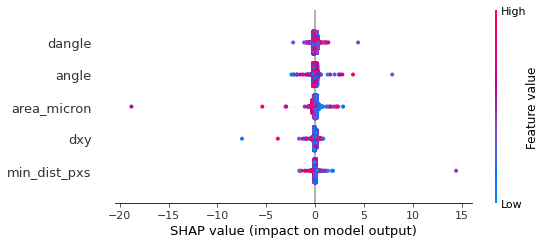

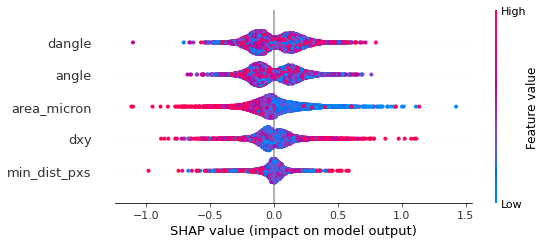

In [7]:
shap_sums_time_d = np.sum(shap_deep, axis=(2))
shap_sums_time_g = np.sum(shap_grad, axis=(2))
X_test_mean = np.mean(X_test, axis=(2))
X_test_mean = pd.DataFrame(X_test_mean, columns=features)
print(shap_sums_time_d.shape)
print(X_test_mean.shape)
#shap.summary_plot(shap_sums_time_d, feature_names.values, features=X_test_mean)
#shap.summary_plot(shap_sums_time_g, feature_names.values, features=X_test_mean)
shap.summary_plot(shap_sums_time_d, features=X_test_mean)
shap.summary_plot(shap_sums_time_g, features=X_test_mean)


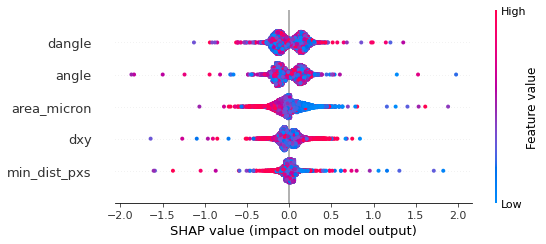

In [8]:
large = np.absolute(shap_sums_time_d) > 2
shap_sums_time_d_trim = shap_sums_time_d.copy()
shap_sums_time_d_trim[large] = 0
shap.summary_plot(shap_sums_time_d_trim, features=X_test_mean)


# Distribution of model accuracy

In [9]:
accuracy = np.array(load_accuracy_list)

(array([ 1.,  0.,  0.,  2.,  1.,  1.,  3.,  1.,  5.,  1.,  4.,  4.,  6.,
         6.,  4.,  6.,  4.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,
         0.,  3.,  4.,  0.,  5.,  2.,  5., 10.,  9., 11., 17., 12., 18.,
        50.]),
 array([0.4109589 , 0.42568493, 0.44041096, 0.45513699, 0.46986301,
        0.48458904, 0.49931507, 0.5140411 , 0.52876712, 0.54349315,
        0.55821918, 0.57294521, 0.58767123, 0.60239726, 0.61712329,
        0.63184932, 0.64657534, 0.66130137, 0.6760274 , 0.69075342,
        0.70547945, 0.72020548, 0.73493151, 0.74965753, 0.76438356,
        0.77910959, 0.79383562, 0.80856164, 0.82328767, 0.8380137 ,
        0.85273973, 0.86746575, 0.88219178, 0.89691781, 0.91164384,
        0.92636986, 0.94109589, 0.95582192, 0.97054795, 0.98527397,
        1.        ]),
 <BarContainer object of 40 artists>)

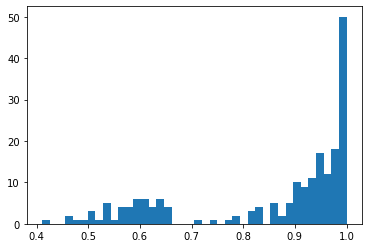

In [10]:
plt.hist(accuracy, bins=40)

In [11]:
# limits for hi and lo accuracy models
acc_lo = np.percentile(accuracy, 20)
acc_hi = np.percentile(accuracy, 80)
print(acc_lo)
print(acc_hi)


0.6335128417564209
0.9861491628614917


In [12]:
accuracy.shape

(200,)

In [13]:
shap_deep_hi = []
shap_deep_lo = []
shap_grad_hi = []
shap_grad_lo = []
X_test_hi = []
X_test_lo = []

for i in range(len(accuracy)):
    if accuracy[i] >= acc_hi:
        shap_deep_hi.append(load_shap_deep_list[i])
        shap_grad_hi.append(load_shap_grad_list[i])
        X_test_hi.append(load_X_test_list[i])
    if accuracy[i] <= acc_lo:
        shap_deep_lo.append(load_shap_deep_list[i])
        shap_grad_lo.append(load_shap_grad_list[i])
        X_test_lo.append(load_X_test_list[i])
        
print(len(shap_deep_hi))
print(len(shap_grad_hi))
print(len(X_test_hi))
print(len(shap_deep_lo))
print(len(shap_grad_lo))
print(len(X_test_lo))

shap_deep_hi = np.concatenate(shap_deep_hi, axis=0)
print(shap_deep_hi.shape)
shap_grad_hi = np.concatenate(shap_grad_hi, axis=0)
print(shap_grad_hi.shape)
X_test_hi = np.concatenate(X_test_hi, axis=0)
print(X_test_hi.shape)

shap_deep_lo = np.concatenate(shap_deep_lo, axis=0)
print(shap_deep_lo.shape)
shap_grad_lo = np.concatenate(shap_grad_lo, axis=0)
print(shap_grad_lo.shape)
X_test_lo = np.concatenate(X_test_lo, axis=0)
print(X_test_lo.shape)


40
40
40
40
40
40
(2921, 5, 28)
(2921, 5, 28)
(2921, 5, 28)
(2852, 5, 28)
(2852, 5, 28)
(2852, 5, 28)


(2921, 5)
(2921, 5)


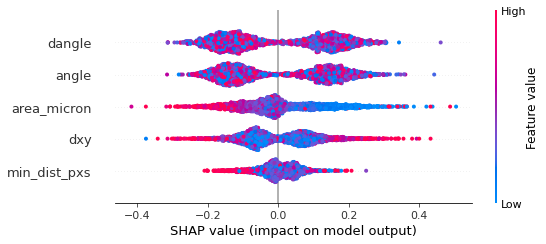

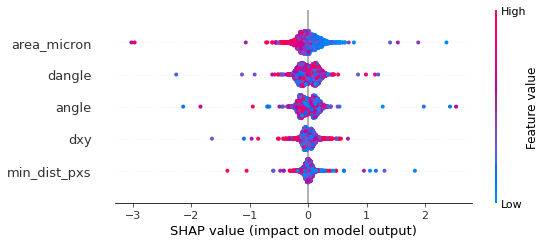

In [19]:
shap_sums_time_d_hi = np.sum(shap_deep_hi, axis=(2))
shap_sums_time_d_lo = np.sum(shap_deep_lo, axis=(2))
X_test_mean_hi = np.mean(X_test_hi, axis=(2))
X_test_mean_hi = pd.DataFrame(X_test_mean_hi, columns=features)
X_test_mean_lo = np.mean(X_test_lo, axis=(2))
X_test_mean_lo = pd.DataFrame(X_test_mean_lo, columns=features)
print(shap_sums_time_d_hi.shape)
print(X_test_mean_hi.shape)

shap.summary_plot(shap_sums_time_d_hi, features=X_test_mean_hi, title="DeepExplainer, most accurate models")
shap.summary_plot(shap_sums_time_d_lo, features=X_test_mean_lo, title="DeepExplainer, least accurate models")


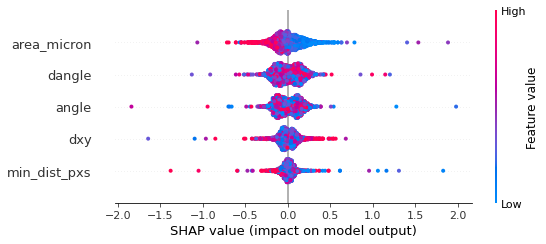

In [15]:
large = np.absolute(shap_sums_time_d_lo) > 2
shap_sums_time_d_lo_trim = shap_sums_time_d_lo.copy()
shap_sums_time_d_lo_trim[large] = 0
shap.summary_plot(shap_sums_time_d_lo_trim, features=X_test_mean_lo)


(2921, 5)
(2921, 5)


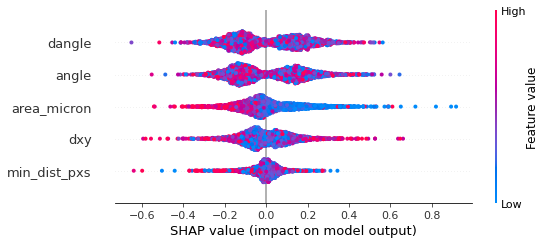

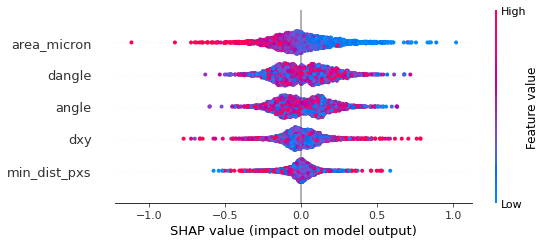

In [20]:
shap_sums_time_g_hi = np.sum(shap_grad_hi, axis=(2))
shap_sums_time_g_lo = np.sum(shap_grad_lo, axis=(2))
print(shap_sums_time_g_hi.shape)
print(X_test_mean_hi.shape)

shap.summary_plot(shap_sums_time_g_hi, features=X_test_mean_hi, title="GradientExplainer, most accurate models")
shap.summary_plot(shap_sums_time_g_lo, features=X_test_mean_lo, title="GradientExplainer, most accurate models")
